# Gradient Extension Analysis

In [1]:
import torch
import torch.nn as nn
from utils import networks, plotting_tools, engine, messing, CKA
from torchvision import datasets, models, transforms

In [2]:
data_path = "../Data" #Include here your data path - torchvision based -

BATCH_SIZE = 64 #Regular parameters
LEARNING_RATE = 0.01
NUM_EPOCH = 5
CRITERION = nn.CrossEntropyLoss() #CrossEntropy loss convey a post softmax probability rating, rather than a feature difference analysis.

train_dataset_MNIST = datasets.MNIST(root=data_path, train=True, transform=transforms.ToTensor())
test_dataset_MNIST = datasets.MNIST(root=data_path, train=False, transform=transforms.ToTensor())

train_loader_MNIST = torch.utils.data.DataLoader(dataset=train_dataset_MNIST, batch_size=BATCH_SIZE, shuffle=True)
test_loader_MNIST = torch.utils.data.DataLoader(dataset=test_dataset_MNIST, batch_size=BATCH_SIZE, shuffle=True)


train_dataset_CIFAR10 = datasets.CIFAR10(root=data_path, train=True, transform=transforms.ToTensor())
test_dataset_CIFAR10 = datasets.CIFAR10(root=data_path, train=False, transform=transforms.ToTensor())

train_loader_CIFAR10 = torch.utils.data.DataLoader(dataset=train_dataset_CIFAR10, batch_size=BATCH_SIZE, shuffle=True)
test_loader_CIFAR10 = torch.utils.data.DataLoader(dataset=test_dataset_CIFAR10, batch_size=BATCH_SIZE, shuffle=True)


train_dataset_CIFAR100 = datasets.CIFAR100(root=data_path, train=True, transform=transforms.ToTensor())
test_dataset_CIFAR100 = datasets.CIFAR100(root=data_path, train=False, transform=transforms.ToTensor())

train_loader_CIFAR100 = torch.utils.data.DataLoader(dataset=train_dataset_CIFAR100, batch_size=BATCH_SIZE, shuffle=True)
test_loader_CIFAR100 = torch.utils.data.DataLoader(dataset=test_dataset_CIFAR100, batch_size=BATCH_SIZE, shuffle=True)

On this specific file, we extend the loss of the gradient at a given point of training, using a specific given direction obtained through training. The approach is mono-dimensional hence weak, but multi-dimensional approach is extremely computationaly demanding, especially as the network gets more intricate.

Starting epoch n°0


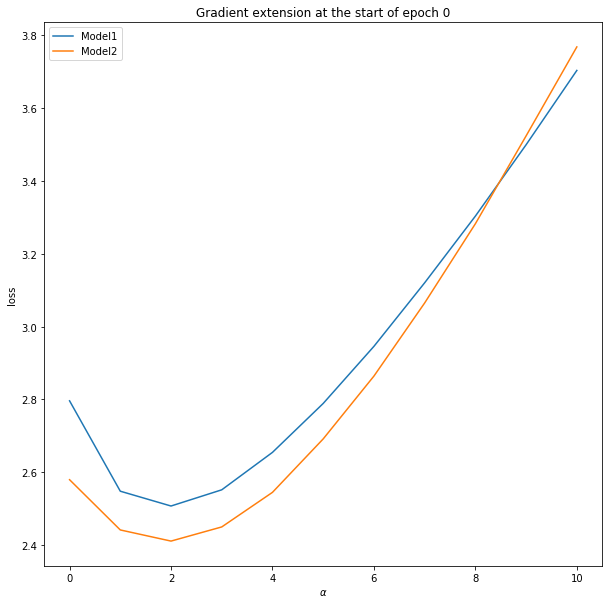

Done: 99%, model1: 47.92%, model2: 49.56%, loss1: 1.1753, loss2: 1.1206 
Ending epoch n°0
Starting epoch n°1


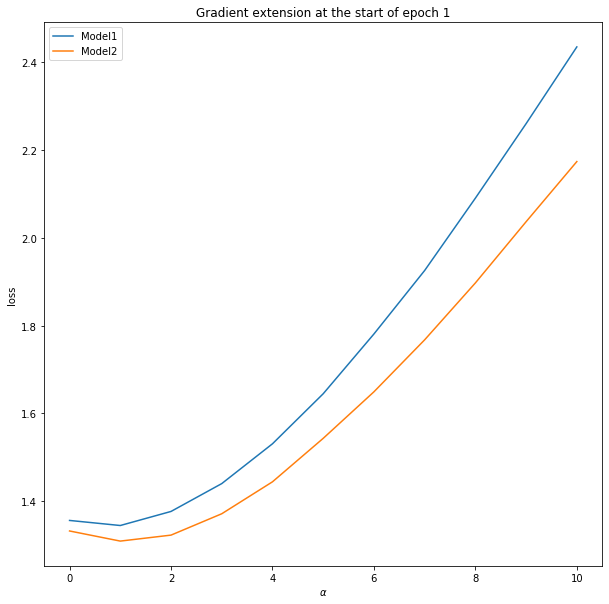

Done: 99%, model1: 53.87%, model2: 55.22%, loss1: 1.0734, loss2: 1.0306 
Ending epoch n°1
Starting epoch n°2


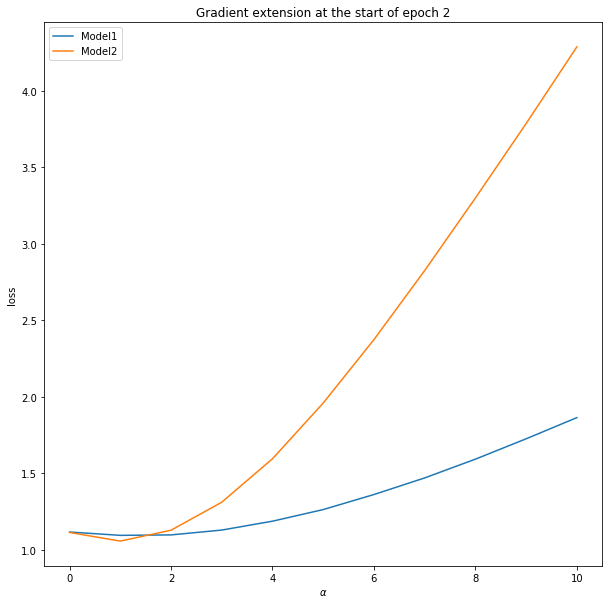

Done: 99%, model1: 54.68%, model2: 54.70%, loss1: 1.6262, loss2: 1.8006 
Ending epoch n°2
Starting epoch n°3


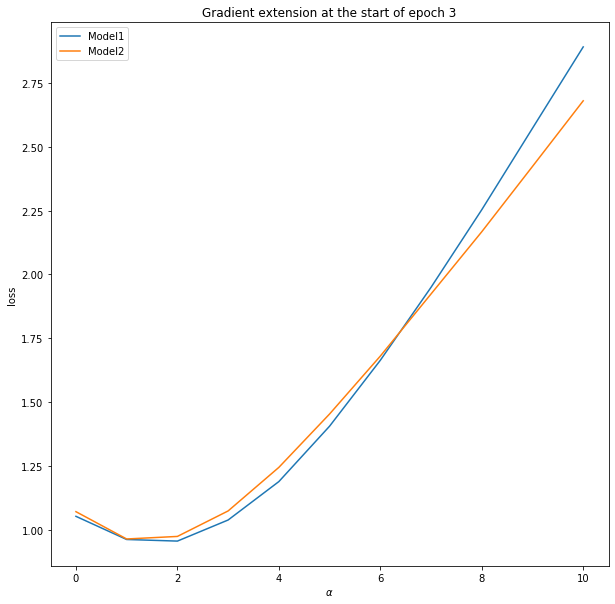

Done: 99%, model1: 58.53%, model2: 60.39%, loss1: 1.3971, loss2: 1.0531 
Ending epoch n°3
Starting epoch n°4


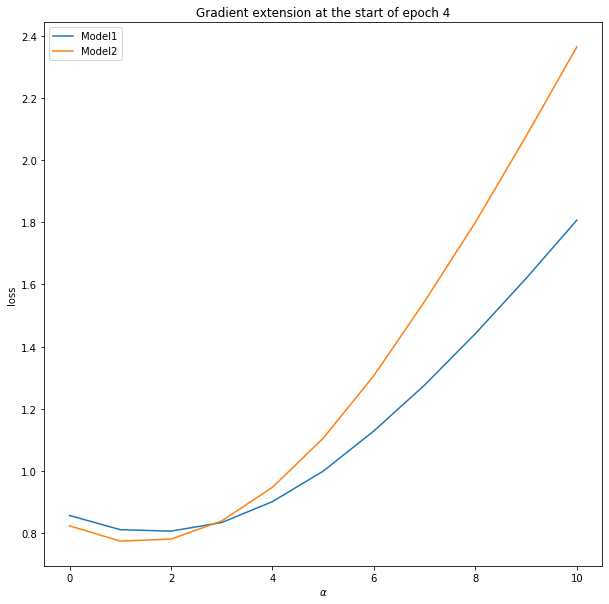

Done: 99%, model1: 60.55%, model2: 62.78%, loss1: 0.6255, loss2: 0.7661 
Ending epoch n°4


In [6]:
LEARNING_RATE = 0.01

model_1 = models.resnet18(num_classes = 10)
model_2 = models.resnet18(num_classes = 10)

messing.zero_mess(model_2)

plotting_val = engine.resnet_compare(model_1.cuda(), model_2.cuda(),nb_epochs=5, test_loader=test_loader_CIFAR10,\
                          train_loader=train_loader_CIFAR10, LEARNING_RATE=LEARNING_RATE, gradient_extension=True)

#The gradient extenstion is a parameter designed to extend the gradient at computing the loss each gradient_range/gradient_ratio

## Network regular state analysis

Starting epoch n°0
Entering gradient extension step: 1/10
Entering gradient extension step: 2/10     
Entering gradient extension step: 3/10     
Entering gradient extension step: 4/10     
Entering gradient extension step: 5/10     
Entering gradient extension step: 6/10     
Entering gradient extension step: 7/10     
Entering gradient extension step: 8/10     
Entering gradient extension step: 9/10     
Entering gradient extension step: 10/10    
Entering gradient extension step: 11/10    
Entering gradient extension step: 1/10     
Entering gradient extension step: 2/10     
Entering gradient extension step: 3/10     
Entering gradient extension step: 4/10     
Entering gradient extension step: 5/10     
Entering gradient extension step: 6/10     
Entering gradient extension step: 7/10     
Entering gradient extension step: 8/10     
Entering gradient extension step: 9/10     
Entering gradient extension step: 10/10    
Entering gradient extension step: 11/10    


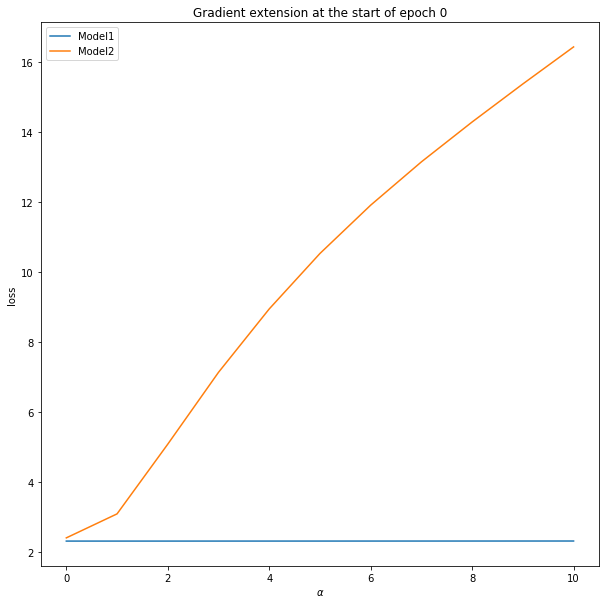

Done: 99%, model1: 9.95%, model2: 46.52%, loss1: 2.3071, loss2: 1.2429 
Ending epoch n°0
Starting epoch n°1
Entering gradient extension step: 1/10
Entering gradient extension step: 2/10     


In [ ]:
LEARNING_RATE = 0.01

model_1 = networks.GenResNet(7, 16, residual = False)
model_2 = networks.GenResNet(7, 16, residual = True)

plotting_val_gen_res = engine.resnet_compare(model_1.cuda(), model_2.cuda(),nb_epochs=5, test_loader=test_loader_CIFAR10,\
                          train_loader=train_loader_CIFAR10, LEARNING_RATE=LEARNING_RATE, gradient_extension=True)

#The gradient extenstion is a parameter designed to extend the gradient at computing the loss each gradient_range/gradient_ratio

In case of connection lost with JupyterLab/Collab/JupyterNotebook, all the plotted value are store in the returned values

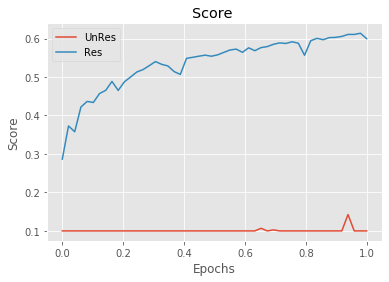

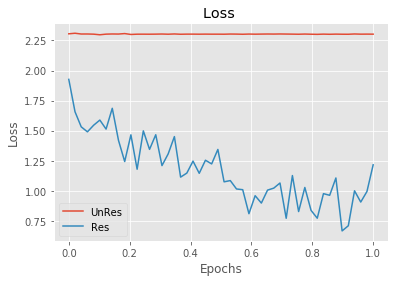

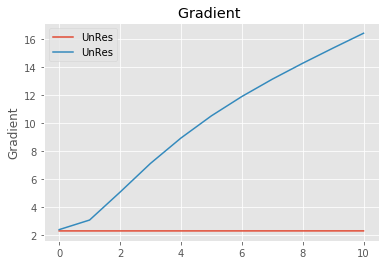

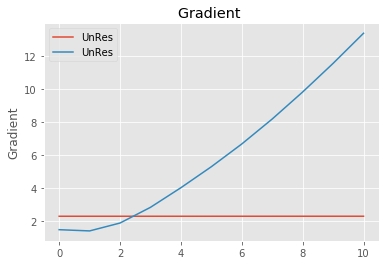

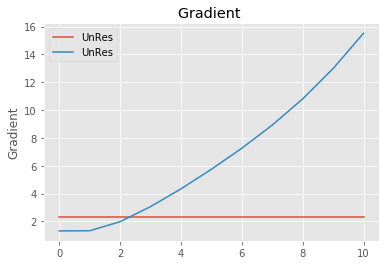

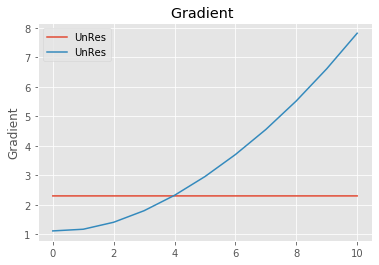

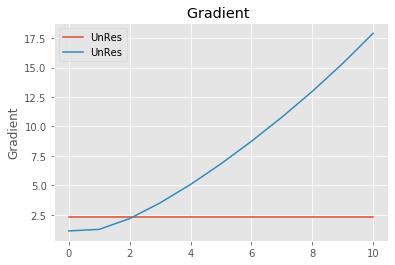

In [55]:
label_list = ["Score","Loss","Gradient"]
name_list = ["UnRes", "Res"]

plotting_tools.comparaison_plot(plotting_val_gen_res, label_list, name_list)